In [85]:
# import libraries
import pandas as pd 
import numpy as np
import glob
import sys

import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm
import statsmodels.formula.api as smf

# load TPRDB library
sys.path.append('/data/critt/tprdb/bin/')
import TPRDB
import importlib
importlib.reload(TPRDB)

<module 'TPRDB' from '/data/critt/tprdb/bin/TPRDB.py'>

In [68]:
# read Arabic and Spanish data
segments = TPRDB.readTPRDBtables(["CLASSES_SI/Tables/", "classar_SI/Tables/"], "*sg", path="/data/critt/tprdb/ATA22/", verbose = 1)

pd.set_option('display.max_columns', 500)

# additional normalized values
segments['nInsTLog'] = np.log((segments['Ins'] + 1) / (segments['TokT'] + 1))
segments['nDelTLog'] = np.log((segments['Del'] + 1) / (segments['TokT'] + 1))
segments['nDurTLog'] = np.log((segments['Dur'] + 1) / (segments['TokT'] + 1))
segments['nDurSLog'] = np.log((segments['Dur'] + 1) / (segments['TokS'] + 1))

segments.head(20)


CLASSES_SI/Tables/	#sessions:8	*sg:94
classar_SI/Tables/	#sessions:14	*sg:164


,Id,Study,Session,SL,TL,Task,Text,Part,STseg,TTseg,Nedit,Dur,FDur,PreGap,TG300,TD300,TB300,TG500,TD500,TB500,TG1000,TD1000,TB1000,TG2000,TD2000,TB2000,TG5000,TD5000,TB5000,Scatter,FixS,TrtS,FixT,TrtT,ParFixS,ParTrtS,ParFixT,ParTrtT,Ins,Del,TokS,LenS,TokT,LenT,LenMT,Yawat,String,TGnbrMean,SGnbrMean,CrossSMean,ISseg,ITseg,ICseg,ISTCseg,HTot,HTotN,nInsTLog,nDelTLog,nDurTLog,nDurSLog
0,1,CLASSES_SI,P05_T4,en,es,T,4,P05,1,1,1,61295,61295,12163,38839,10293,26,36800,12332,21,31642,17490,13,18154,30978,4,11036,38096,2,0.20,45,10102,78,23126,0,0,0,0,86,26,11,55,11,63,0,---,El_racismo_se_reconoce_fácilmente_en_sus_forma...,1.27,1.36,1.64,0.45,0.82,0.91,1.00,4.46,1.00,1.981001,0.810930,8.538563,8.538563
1,2,CLASSES_SI,P05_T4,en,es,T,4,P05,2,2,1,76932,76932,13149,40140,23643,40,32010,31773,20,23360,40423,7,19669,44114,4,9104,54679,1,0.18,76,18263,67,18005,0,0,0,0,165,68,20,114,19,98,0,---,"De_hecho_,_en_los_últimos_años_,_el_racismo_má...",0.75,0.85,2.35,0.50,0.70,0.70,0.80,4.47,0.84,2.116256,1.238374,8.254958,8.206168
2,3,CLASSES_SI,P05_T4,en,es,T,4,P05,3,3,2,62524,62524,13673,30065,18786,21,26535,22316,12,22040,26811,6,18848,30003,3,16224,32627,2,0.15,54,11204,51,16952,0,0,0,0,141,27,22,99,23,117,0,---,"Sin_embargo_,_el_rostro_del_racismo_ha_cambiad...",0.91,0.91,3.41,0.27,0.50,0.50,0.64,4.69,0.86,1.777773,0.154151,7.865268,7.907828
3,4,CLASSES_SI,P05_T4,en,es,T,4,P05,4,4,2,76366,76366,20073,35306,20987,30,29524,26769,15,26039,30254,10,18853,37440,4,11091,45202,2,0.20,32,7290,110,34565,0,0,0,0,177,70,15,88,18,107,0,---,Esta_ley_define_el_racismo_no_solamente_como_a...,1.07,1.00,1.27,0.13,0.60,0.60,0.80,4.62,0.94,2.237345,1.318241,8.298867,8.470717
4,5,CLASSES_SI,P05_T4,en,es,T,4,P05,5,5,1,208387,208387,34945,130271,43171,64,120744,52698,40,108157,65285,21,93392,80050,10,69101,104341,3,0.13,121,27049,202,55570,0,0,0,0,364,91,41,218,46,276,0,---,Puede_que_todos_coincidamos_en_que_el_racismo_...,0.93,0.93,4.61,0.44,0.71,0.76,0.83,5.43,0.85,2.049750,0.671641,8.397009,8.509487
5,6,CLASSES_SI,P05_T4,en,es,T,4,P05,6,6,1,103362,103362,56321,26697,20344,28,21650,25391,15,17081,29960,8,7531,39510,2,0,47041,0,0.08,86,19673,73,17410,0,0,0,0,174,27,22,126,23,151,0,---,Aunque_el_racismo_manifiesto_ha_disminuido_sig...,1.18,1.14,1.50,0.32,0.55,0.68,0.82,5.01,0.92,1.986732,0.154151,8.367949,8.410508
6,7,CLASSES_SI,P05_T4,en,es,T,4,P05,7,7,1,8257,8257,2142,1251,4864,3,0,6115,0,0,6115,0,0,6115,0,0,6115,0,0.15,0,0,13,5285,0,0,0,0,45,9,5,29,7,37,0,---,El_racismo_puede_tener_sus_ventajas_.,1.00,1.00,1.40,0.00,0.40,0.40,0.60,2.92,0.88,1.749200,0.223144,6.939496,7.227178
7,8,CLASSES_SI,P05_T4,en,es,T,4,P05,8,8,1,50687,50687,17839,18754,14094,14,18274,14574,13,12608,20240,5,8488,24360,2,0,32848,0,0.15,94,21079,71,20416,0,0,0,0,134,28,18,107,18,108,0,---,Discriminar_a_los_demás_puede_dar_un_chute_de_...,0.94,1.00,1.06,0.39,0.44,0.39,0.61,4.44,0.86,1.960836,0.422857,7.889005,7.889005
8,9,CLASSES_SI,P05_T4,en,es,T,4,P05,9,9,1,94866,94866,11699,44896,38271,42,35221,47946,18,27203,55964,6,24862,58305,4,21238,61929,3,0.24,105,23348,122,50673,0,0,0,0,283,106,27,161,29,181,0,---,"Concretamente_,_la_discriminación_supone_venta...",1.00,1.07,3.30,0.41,0.78,0.63,0.96,5.48,0.95,2.247777,1.271631,8.059034,8.128027
9,10,CLASSES_SI,P05_T4,en,es,T,4,P05,10,10,1,224000,224000,19468,139568,64964,94,126371,78161,61,105413,99119,28,89546,114986,17,61322,143210,7,0.23,186,45100,441,128023,0,0,0,0,479,247,25,165,40,238,0,---,El_racismo_aversivo_es_una_contradicción_inher...,1.08,1.16,4.40,0.32,0.52,0.56,0.68,5.28,0.94,2.460214,1.799857,8.605834,9.061309


# Linear Regression
single line that best fits the data, i.e the smallest overall distance from the line to the points

- Dependent variable: $Y$ 
- Independent variable: $X$
- Intercept: β$_0$
- Slope: β$_1$


Dependent and independent variables cannot be swapped
On average, across all observations, the error $\epsilon$ is 0.


Null hypothesis: all the β$_0$ and β$_1$ are zero: independent vriables have no effect on dependent variable
    

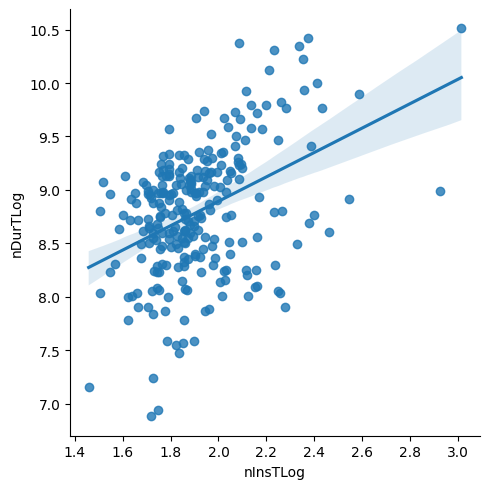

In [69]:
sns.lmplot(y="nDurTLog", x="nInsTLog",  data=segments);


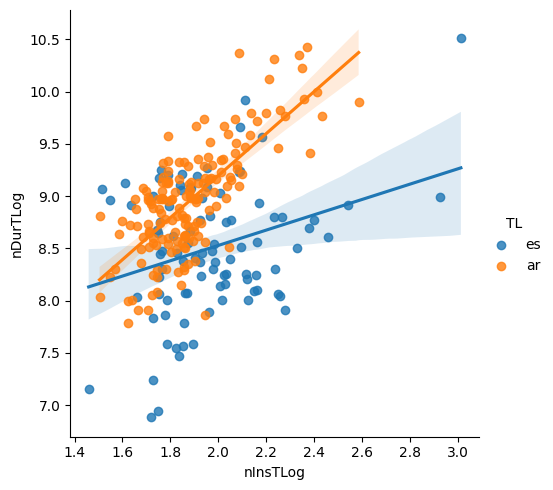

In [70]:
sns.lmplot(y="nDurTLog", x="nInsTLog", hue='TL', data=segments);

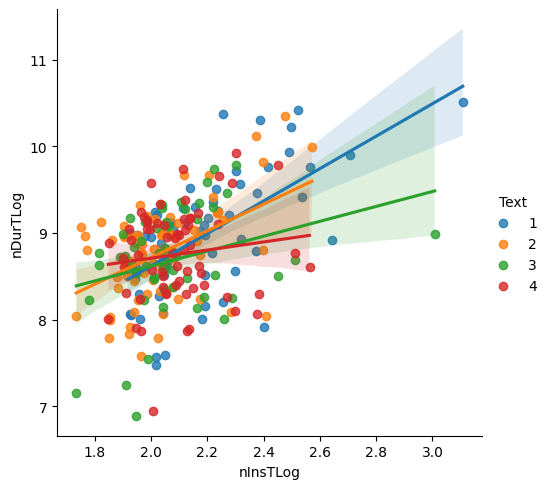

In [41]:
sns.lmplot(y="nDurTLog", x="nInsTLog", hue='Text', data=segments);


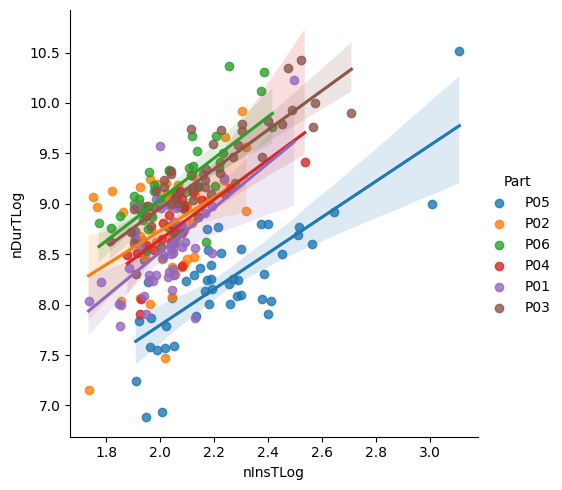

In [42]:
sns.lmplot(y="nDurTLog", x="nInsTLog", hue='Part', data=segments);


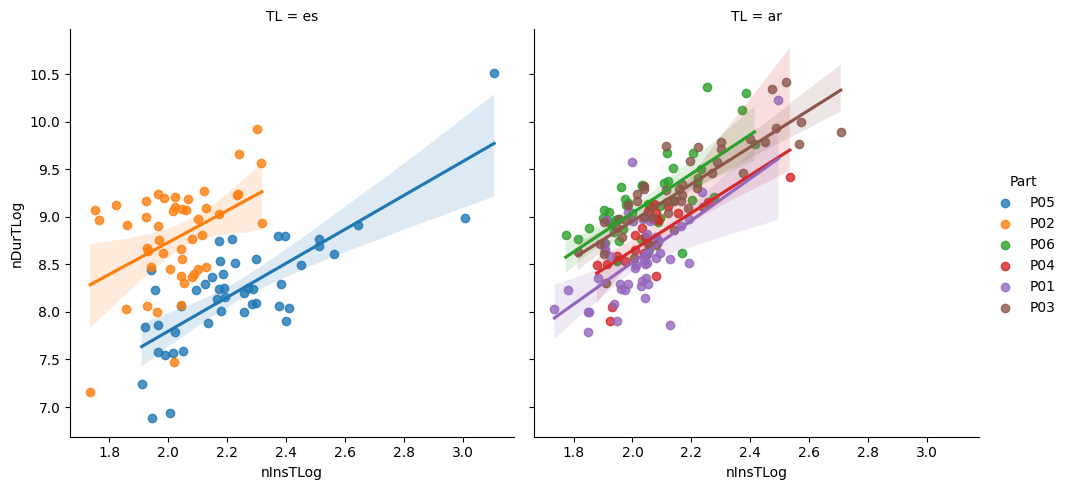

In [43]:
sns.lmplot(y="nDurTLog", x="nInsTLog", hue='Part', col="TL", data=segments);


## OLS Ordinary least square Regression

nDurTLog ~ nInsLog
 

                            OLS Regression Results                            
Dep. Variable:                    Dur   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     72.03
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           1.74e-15
Time:                        21:59:55   Log-Likelihood:                -3324.3
No. Observations:                 258   AIC:                             6653.
Df Residuals:                     256   BIC:                             6660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.954e+04   1.26e+04      5.506      0.0

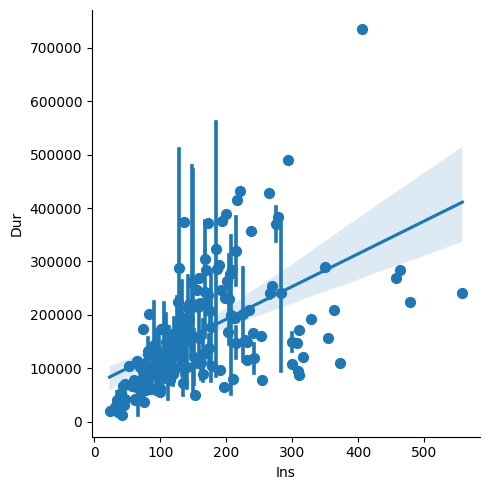

In [44]:
# Regression with single independent variable

lmf = smf.ols(formula="Dur ~ Ins", data=segments).fit()

print(lmf.summary())
sns.lmplot(y="Dur", x="Ins", x_estimator=np.mean, data=segments);

plt.show()

                            OLS Regression Results                            
Dep. Variable:               nDurTLog   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     57.44
Date:                Thu, 25 May 2023   Prob (F-statistic):           6.38e-13
Time:                        10:11:07   Log-Likelihood:                -210.93
No. Observations:                 258   AIC:                             425.9
Df Residuals:                     256   BIC:                             433.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4842      0.315     20.613      0.0

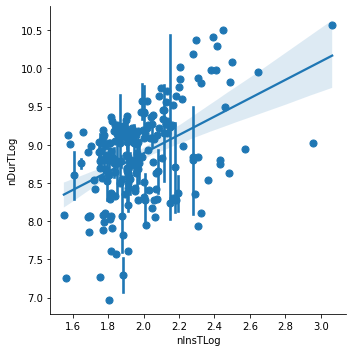

In [36]:
# Regression with single independent variable

lmf = smf.ols(formula="nDurTLog ~ nInsTLog", data=segments).fit()
print(lmf.summary())
sns.lmplot(y="nDurTLog", x="nInsTLog", x_estimator=np.mean, data=segments);

plt.show()

                            OLS Regression Results                            
Dep. Variable:               nDurTLog   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     29.34
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           3.40e-12
Time:                        22:01:48   Log-Likelihood:                -209.24
No. Observations:                 258   AIC:                             424.5
Df Residuals:                     255   BIC:                             435.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6731      0.731      7.756      0.0

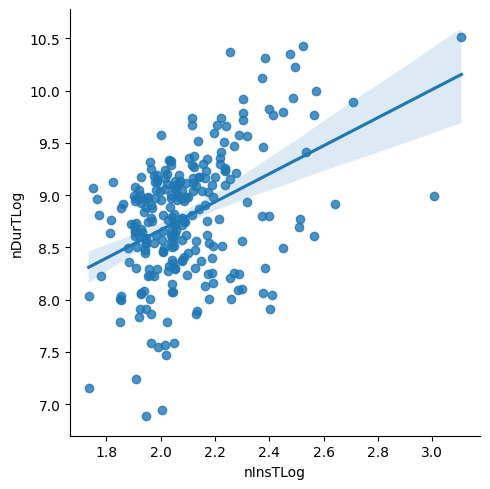

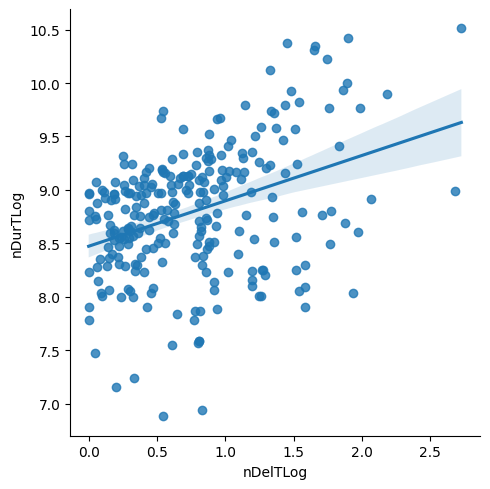

In [47]:
# Regression 

lmf = smf.ols(formula="nDurTLog ~ (nInsTLog + nDelTLog)", data=segments).fit()
print(lmf.summary())

sns.lmplot(y="nDurTLog", x="nInsTLog", data=segments);
sns.lmplot(y="nDurTLog", x="nDelTLog", data=segments);

plt.show()

                            OLS Regression Results                            
Dep. Variable:               nDurTLog   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     63.62
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           1.03e-30
Time:                        22:02:08   Log-Likelihood:                -163.66
No. Observations:                 258   AIC:                             335.3
Df Residuals:                     254   BIC:                             349.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.2284 

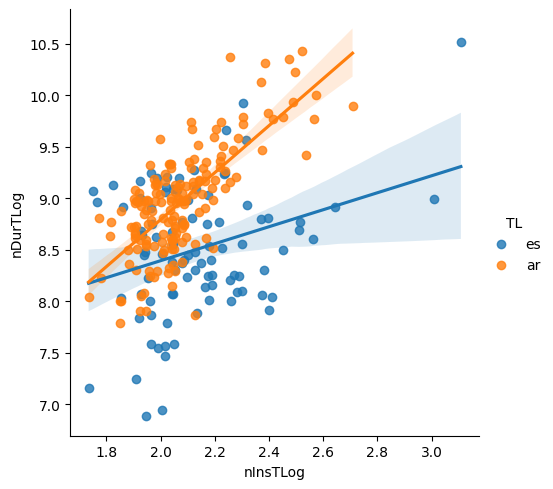

In [48]:
# Regression 

lmf = smf.ols(formula="nDurTLog ~ nInsTLog * C(TL)", data=segments).fit()
print(lmf.summary())
sns.lmplot(y="nDurTLog", x="nInsTLog", hue="TL",  data=segments);

plt.show()

                            OLS Regression Results                            
Dep. Variable:               nDurTLog   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     47.33
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           1.83e-54
Time:                        22:02:36   Log-Likelihood:                -89.330
No. Observations:                 258   AIC:                             202.7
Df Residuals:                     246   BIC:                             245.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

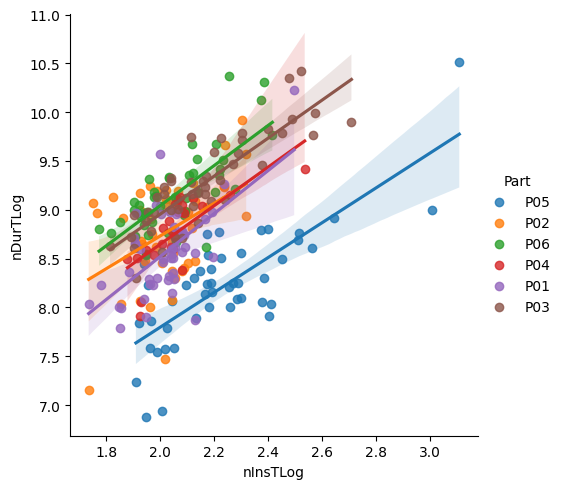

In [49]:
# Regression 

lmf = smf.ols(formula="nDurTLog ~ nInsTLog  * C(Part)", data=segments).fit()

print(lmf.summary())
sns.lmplot(y="nDurTLog", x="nInsTLog",  hue='Part', data=segments);

plt.show()

| Correlation | Regression|
| :--- | :--- |
| Correlation determines the interconnection or a co-relationship between the variables. | Regression explains how an independent variable is numerically associated with the dependent variable. |
| In Correlation the independent and dependent values have no difference. | In Regression, the dependent and independent variables are different. |
|Correlation stipulates the degree to which both of the variables can move together. |	Regression specifies the effect of the change in the unit, in the known variable($x$) on the evaluated variable ($y$). |
|Correlation helps to constitute the connection between the two variables. | Regression helps in estimating a variable’s value based on another given value.|

In [ ]:
# Task:
# design a model that takes into account 'Text' as a variable 
# design a model that takes into account 'STseg' as a variable 
# test the effect of Gaze data on Task du 



# More comlex Model

In [50]:
# non- normalized version, taking into account the length of the ST and TT
lmf = smf.ols(formula="Dur ~ (Ins + TokS + TokT + TrtS + TrtT) * C(Part)", data=segments).fit()
print(lmf.summary())


                            OLS Regression Results                            
Dep. Variable:                    Dur   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     26.96
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           8.28e-62
Time:                        22:03:02   Log-Likelihood:                -3142.3
No. Observations:                 258   AIC:                             6357.
Df Residuals:                     222   BIC:                             6485.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.463e+04   2

# Testing Residuals

                            OLS Regression Results                            
Dep. Variable:               nDurSLog   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     1059.
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           6.11e-93
Time:                        22:12:21   Log-Likelihood:                -11.475
No. Observations:                 258   AIC:                             26.95
Df Residuals:                     256   BIC:                             34.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1295      0.231      4.892      0.0

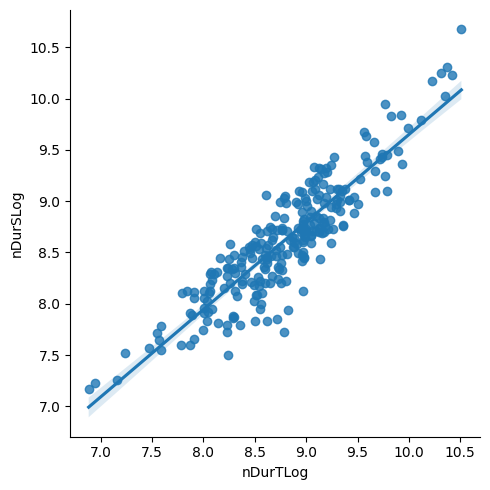

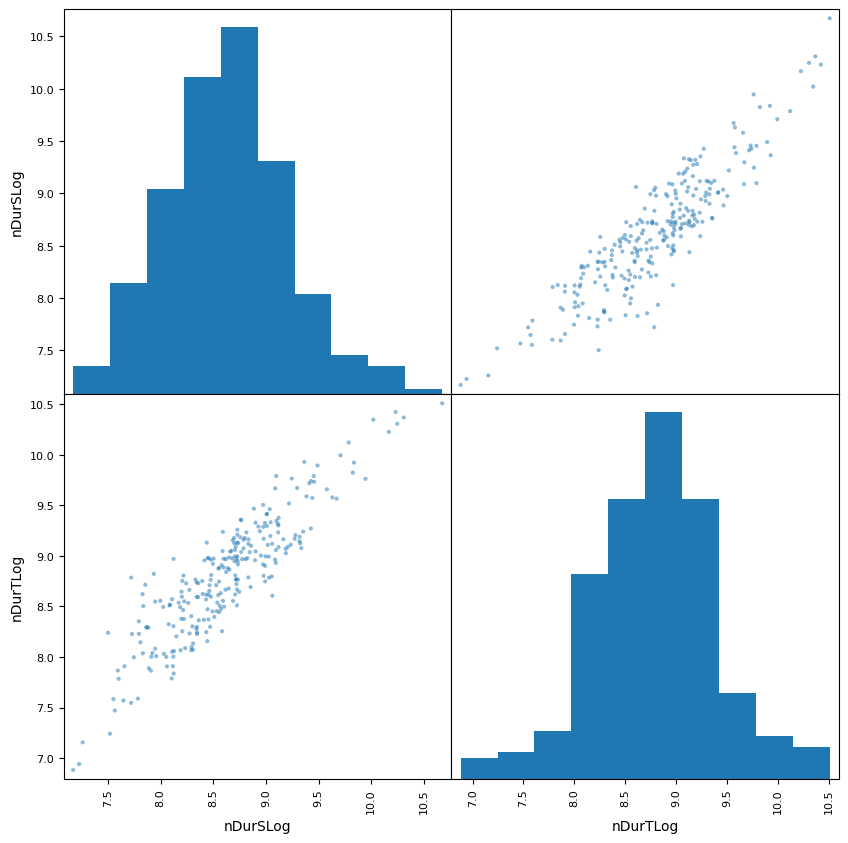

In [71]:

lmf = smf.ols(formula="nDurSLog ~ nDurTLog", data=segments).fit()
print(lmf.summary())

sns.lmplot(y="nDurSLog", x="nDurTLog", data=segments);
pd.plotting.scatter_matrix(segments[["nDurSLog","nDurTLog"]], figsize=(10, 10))
plt.show()

#### with interaction
#lmf = smf.ols(formula="nDurSLog ~ nDurTLog * C(Part)", data=segments).fit()
#print(lmf.summary())
#sns.lmplot(y="nDurSLog", x="nDurTLog",  hue='Part', data=segments);


/tmp/ipykernel_73839/2442658988.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(lmf.resid, hist = False, kde_kws = {"shade" : True, "lw": 1}, fit = stats.norm)
/home/jupyterlab/JupyterLab/venv/lib/python3.12/site-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


Text(0.5, 0, 'Residuals')

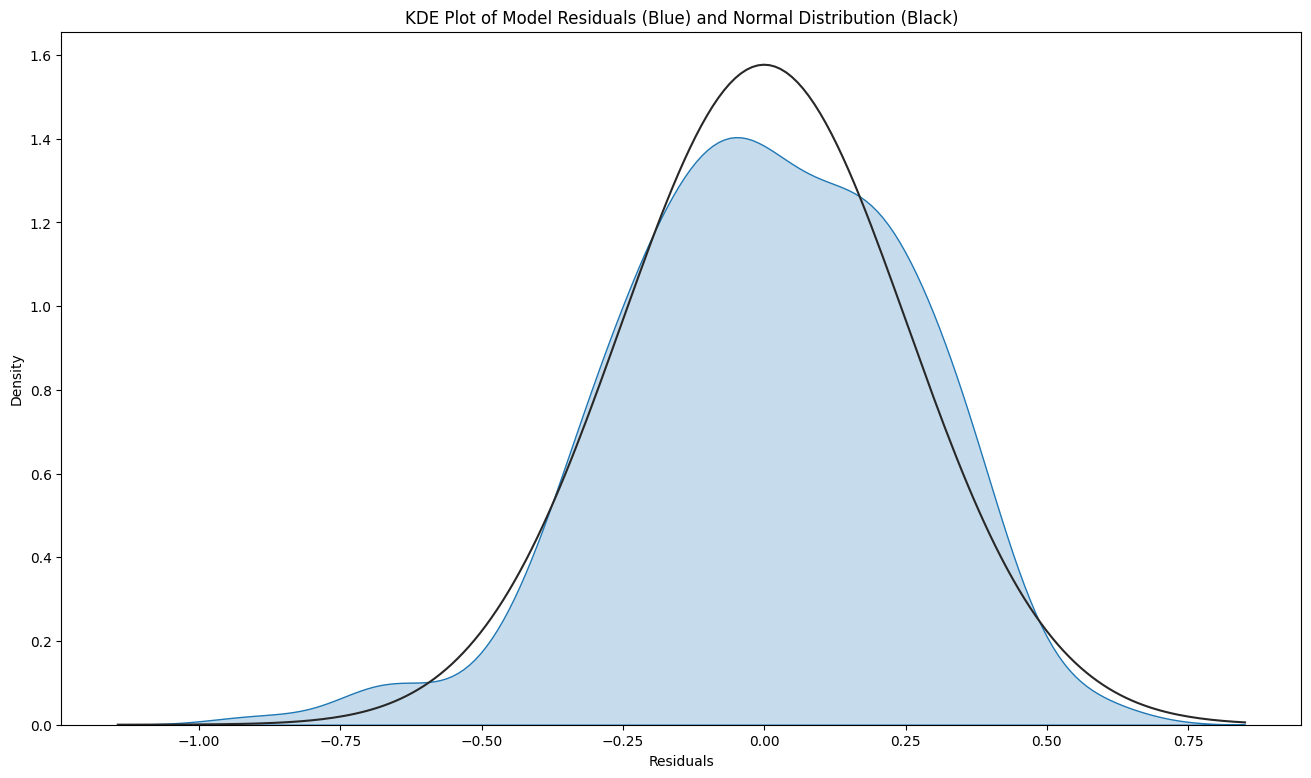

In [82]:
import scipy.stats as stats
fig = plt.figure(figsize = (16, 9))

ax = sns.distplot(lmf.resid, hist = False, kde_kws = {"shade" : True, "lw": 1}, fit = stats.norm)

ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")

Text(0.5, 1.0, 'Q-Q Plot')

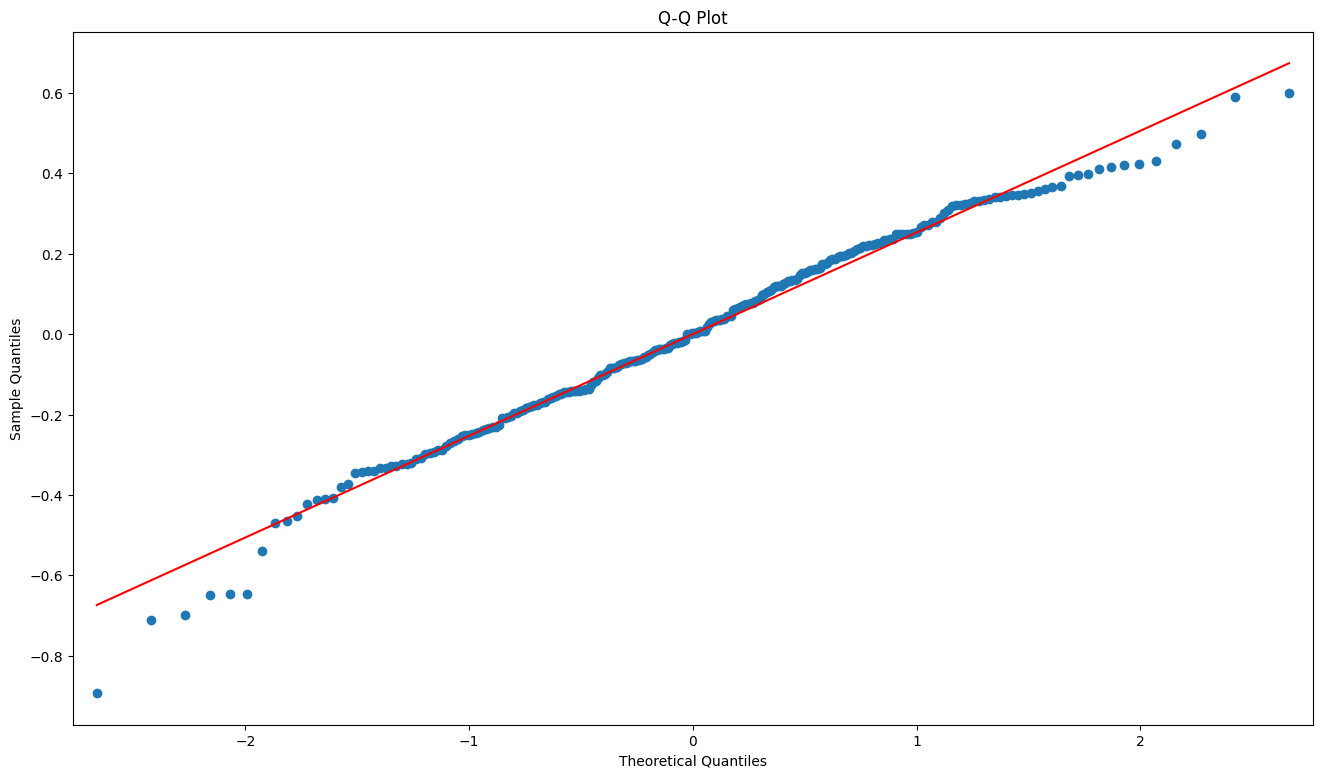

In [83]:
## Q-Q PLot

fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

statsmodels.graphics.gofplots.qqplot(lmf.resid, dist = stats.norm, line = 's', ax = ax)
#sm.qqplot(lmf.resid, dist = stats.norm, line = 's', ax = ax)

ax.set_title("Q-Q Plot")


Text(0, 0.5, 'Residuals')

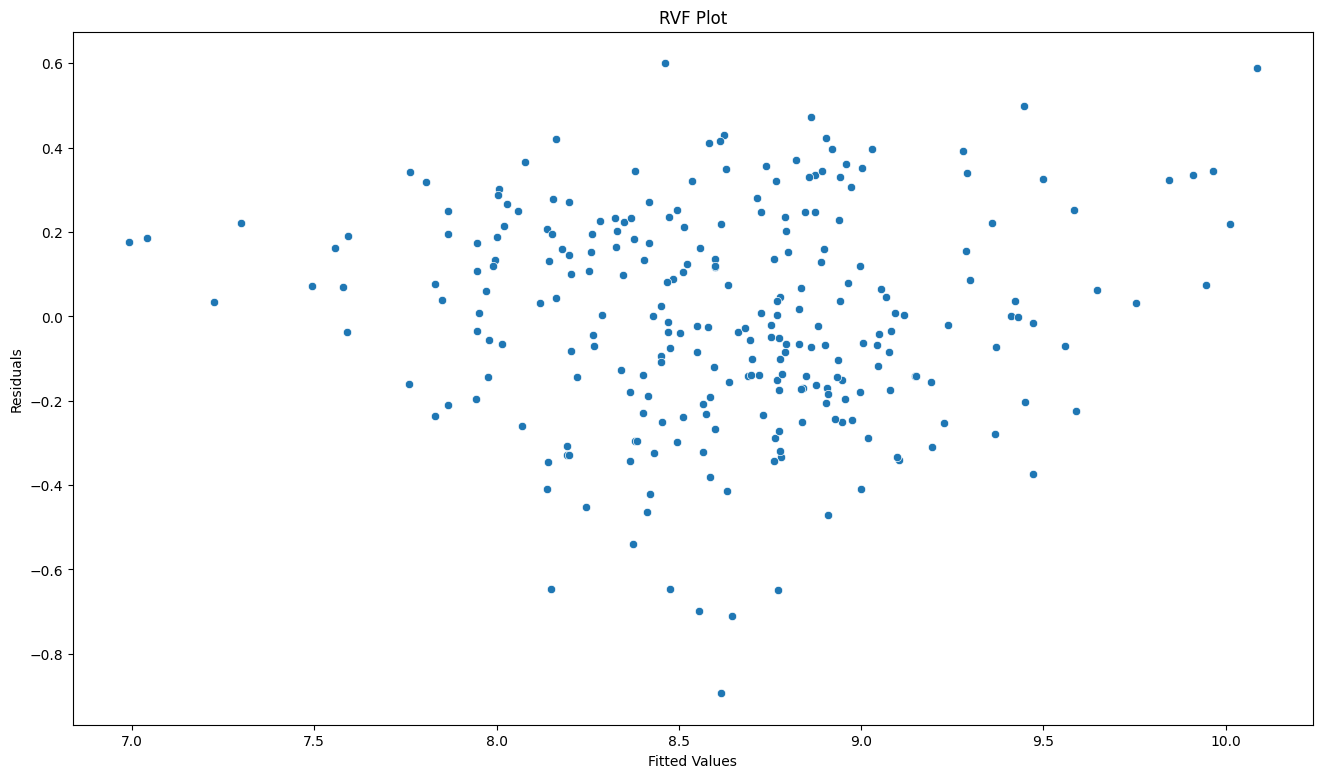

In [84]:
fig = plt.figure(figsize = (16, 9))

ax = sns.scatterplot(y = lmf.resid, x = lmf.fittedvalues)

ax.set_title("RVF Plot")
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals")